# SD212: Graph mining
## Lab 5: Heat diffusion

In this lab, you will learn to use heat diffusion for **contrastive ranking** and **node classification**.

## Import

In [3]:
from IPython.display import SVG

In [4]:
import numpy as np
from scipy import sparse

In [5]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.regression import Dirichlet, Diffusion
from sknetwork.classification import DiffusionClassifier, get_accuracy_score
from sknetwork.ranking import PageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph + bipartite graph)

In [12]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Grid

We first illustrate the notion of **contrastive ranking** on a $k\times k$ grid.

In [13]:
k = 5
dataset = grid(k, k, True)
adjacency = dataset.adjacency
position = dataset.position

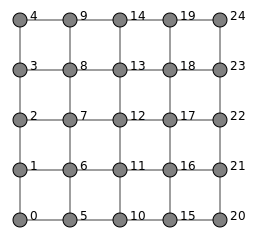

In [14]:
image = svg_graph(adjacency, position, names=np.arange(k * k), width=200, height=200)
SVG(image)

## To do

* Display the solution to the Dirichlet problem with 1 hot source and 1 cold source, located on the opposite corners of the square.
* Add a hot source at the top-left corner of the square. What is the free node of highest temperature?

In [15]:
dirichlet = Dirichlet()

In [16]:
bottom_left = 0
top_right = k * k - 1

In [17]:
values = {bottom_left: 0, top_right: 1}

In [18]:
temperatures = dirichlet.fit_predict(adjacency, values=values)

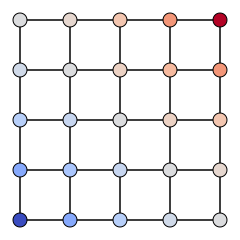

In [19]:
image = svg_graph(adjacency, position, scores=temperatures, width=200, height=200)
SVG(image)

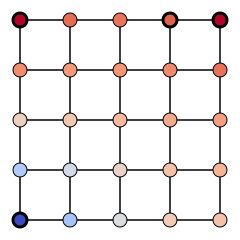

In [20]:
top_left = k - 1

values = {bottom_left: 0, top_right: 1, top_left: 1}
temperatures = dirichlet.fit_predict(adjacency, values=values)
temp = np.where(temperatures == 1, -1, temperatures)
free_highest_node = np.argmax(temp)
values = {bottom_left: 0, top_right: 1, top_left: 1, free_highest_node: 1}
image = svg_graph(adjacency, position, scores=temperatures,
                  seeds=values, width=200, height=200)
SVG(image)


## Karate Club


We now consider the **classification** of nodes by heat diffusion. We use the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) that has ground-truth labels.

In [21]:
dataset = karate_club(True)

In [22]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

In [23]:
n = len(labels_true)

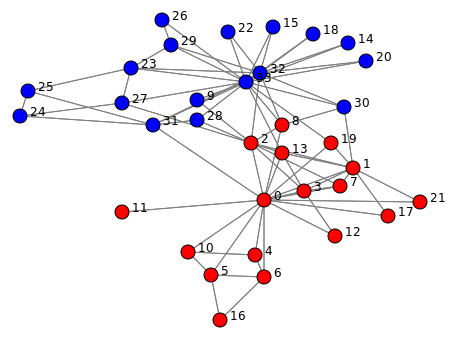

In [24]:
image = svg_graph(adjacency, position, labels=labels_true, names=np.arange(n))
SVG(image)

## To do

* Select one node in each ground-truth cluster, and predict the labels of the other nodes by heat diffusion.
* Display the graph with the predicted labels. 
* What is the accuracy of the classification?

In [25]:
classifier = DiffusionClassifier()

Accuracy : 0.97

Prediction


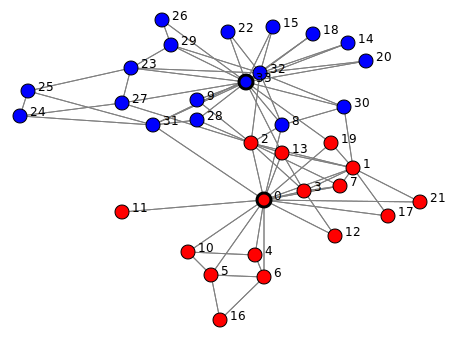

Ground truth


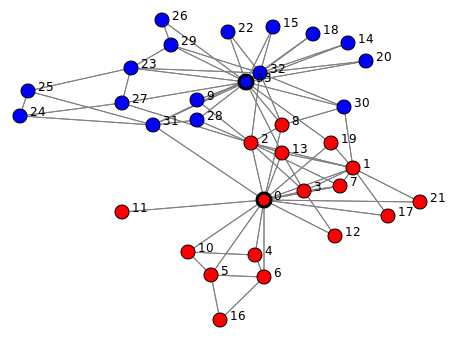

In [26]:
# Select a node in each ground truth cluster
nodes = [0, 33]

labels = {i: labels_true[i] for i in nodes}

# Diffusion
labels_pred = classifier.fit_predict(adjacency, labels)

# Accuracy
accuracy = get_accuracy_score(labels_true, labels_pred)
print("Accuracy :", np.round(accuracy, 2))

print("\nPrediction")
image = svg_graph(adjacency, position, labels=labels_pred,
                  seeds=labels, names=np.arange(n))
display(SVG(image))

print("Ground truth")
image = svg_graph(adjacency, position, labels=labels_true,
                    seeds=labels, names=np.arange(n))
display(SVG(image))


## To do

The classifier applies temperature centering after diffusion.

* Repeat the same experiment without temperature centering.
* Do the same experiments with 3 nodes in a ground-truth label and 1 in the other.
* What is your conclusion?

Accuracy : 0.97

Prediction


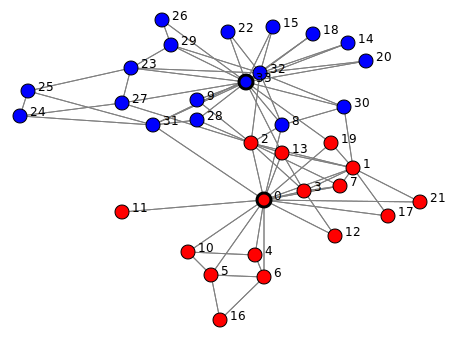

Ground truth


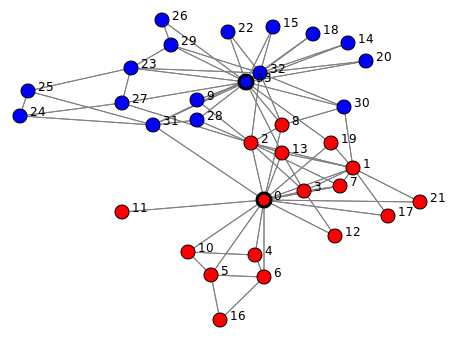

In [27]:
# Without temperature centering
classifier = DiffusionClassifier(centering=False)
# Select a node in each ground truth cluster
nodes = [0, 33]

labels = {i: labels_true[i] for i in nodes}

# Diffusion
labels_pred = classifier.fit_predict(adjacency, labels)

# Accuracy
accuracy = get_accuracy_score(labels_true, labels_pred)
print("Accuracy :", np.round(accuracy, 2))

print("\nPrediction")
image = svg_graph(adjacency, position, labels=labels_pred,
                  seeds=labels, names=np.arange(n))
display(SVG(image))

print("Ground truth")
image = svg_graph(adjacency, position, labels=labels_true,
                    seeds=labels, names=np.arange(n))
display(SVG(image))


Accuracy : 0.56

Prediction


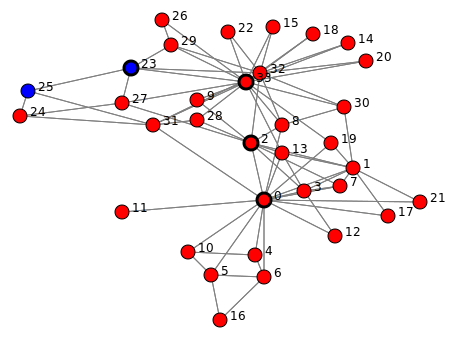

Ground truth


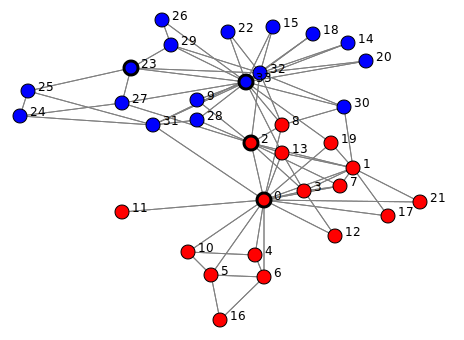

In [28]:
# Same experiment with 3 nodes in a ground-truth label and 1 in the other.
# Select a node in each ground truth cluster
nodes = [0, 2, 23]

labels = {i: labels_true[i] for i in nodes}
labels[33] = 1 - labels_true[33]

# Diffusion
labels_pred = classifier.fit_predict(adjacency, labels)

# Accuracy
accuracy = get_accuracy_score(labels_true, labels_pred)
print("Accuracy :", np.round(accuracy, 2))

print("\nPrediction")
image = svg_graph(adjacency, position, labels=labels_pred,
                  seeds=labels, names=np.arange(n))
display(SVG(image))

print("Ground truth")
image = svg_graph(adjacency, position, labels=labels_true,
                    seeds=labels, names=np.arange(n))
display(SVG(image))


## Openflights


We now show how to classify the nodes of a graph **without labels**. We identify some nodes of interest and use these seeds to classify the other nodes.

In [29]:
dataset = openflights

In [30]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

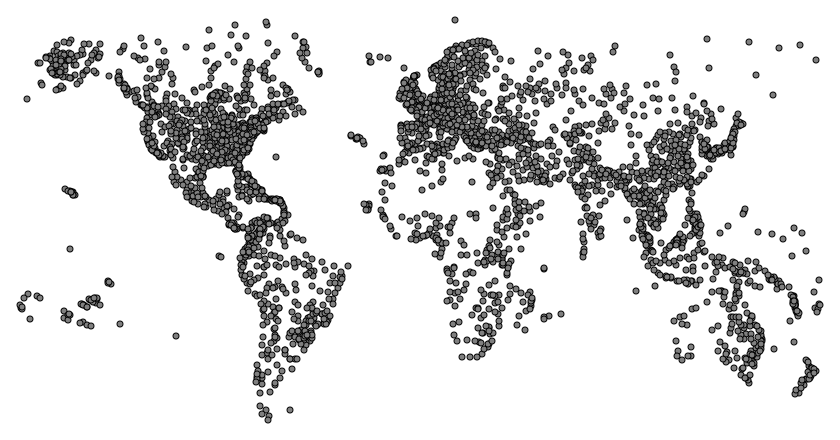

In [31]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the labels predicted for 3 seeds (Paris, New-York, Beijing), each with its own  label.
* Add Madrid with another label and observe the result.

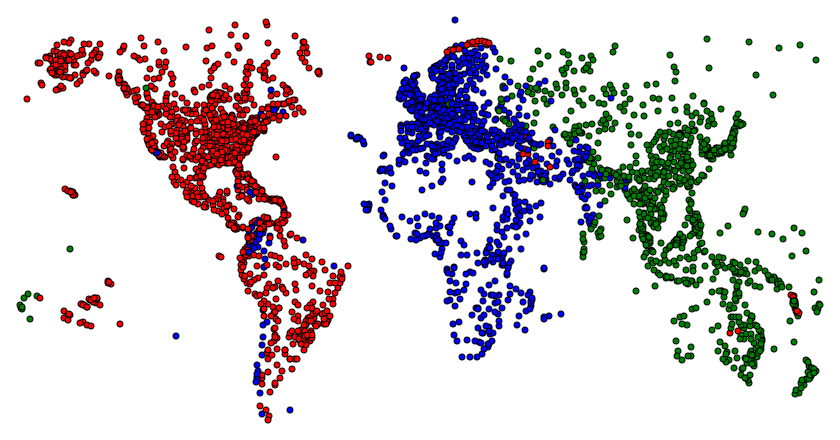

In [32]:
paris = 622
new_york = 1842
beijing = 1618
madrid = 572

labels = {paris: 0, new_york: 1, beijing: 2}

classifier = DiffusionClassifier()
labels_pred = classifier.fit_predict(adjacency, labels)

image = svg_graph(adjacency, position, labels=labels_pred, seeds=labels,
                    width=800, height=400, node_size=3, display_edges=False)
SVG(image)

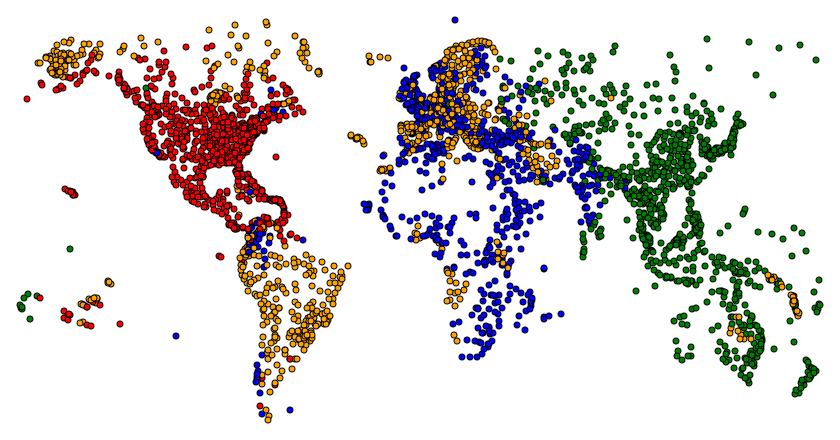

In [33]:
labels = {paris: 0, new_york: 1, beijing: 2, madrid: 3}

classifier = DiffusionClassifier()
labels_pred = classifier.fit_predict(adjacency, labels)

image = svg_graph(adjacency, position, labels=labels_pred, seeds=labels,
                    width=800, height=400, node_size=3, display_edges=False)
SVG(image)

Finally, we illustrate **contrastive ranking** on Openflights.

## To do

* List the top-10 airports that are close to Tokyo in terms of Personalized PageRank.
* List of the top-10 airports that are close to Tokyo and far from Paris Charles de Gaulle, using heat diffusion (contrastive ranking).<br>What do you observe?
* Display the temperatures of these airports after heat diffusion and explain the result.

0 Tokyo Haneda International Airport
1 Incheon International Airport
2 Naha Airport
3 Taiwan Taoyuan International Airport
4 Osaka International Airport
5 Shanghai Pudong International Airport
6 New Chitose Airport
7 Kansai International Airport
8 Narita International Airport
9 Chubu Centrair International Airport


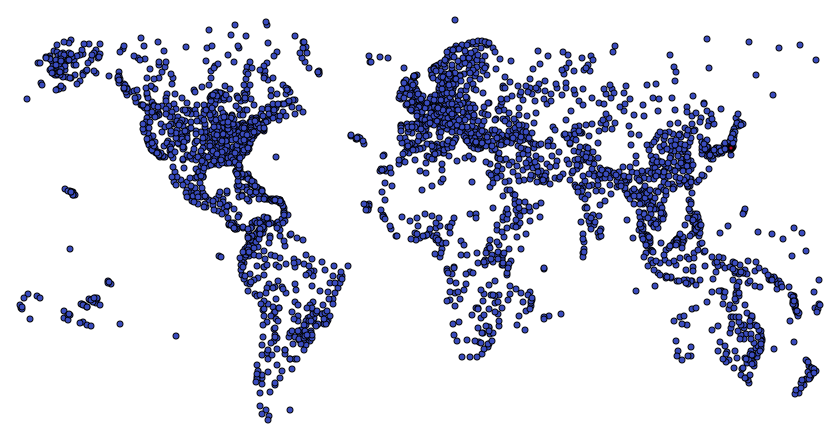



0 Tokachi-Obihiro Airport 1.0
1 Izumo Airport 1.0
2 Iwami Airport 1.0
3 Monbetsu Airport 1.0
4 Kitakyūshū Airport 1.0
5 Tokyo Haneda International Airport 1.0
6 Tottori Airport 1.0
7 Shonai Airport 1.0
8 Tokushima Airport 1.0
9 Odate Noshiro Airport 1.0


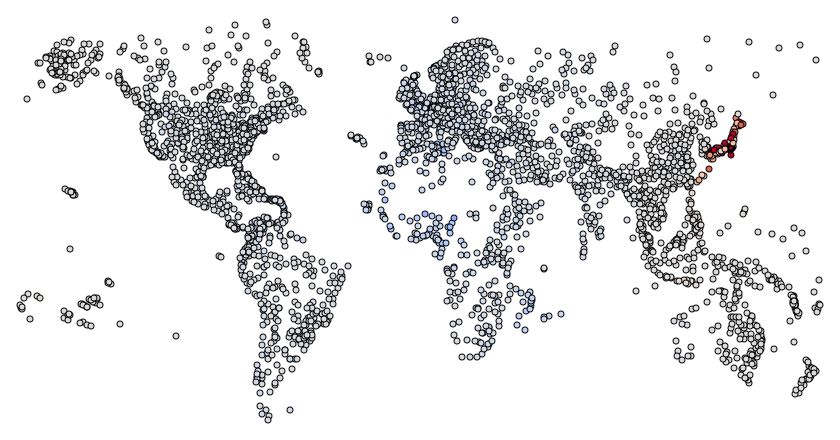

In [34]:
# List the top-10 airports that are close to Tokyo in terms of Personalized PageRank.

n = len(names)
tokyo = 1084
seeds = {tokyo: 1}
pr = PageRank()
scores = pr.fit_transform(adjacency, seeds)
top10 = top_k(scores, k=10)
for idx, i in enumerate(top10):
    print(idx, names[i])
# Display pagerank scores

image = svg_graph(adjacency, position, scores=scores, seeds=seeds,
                    width=800, height=400, node_size=3, display_edges=False)
display(SVG(image))

print("\n")
# List of the top-10 airports that are close to Tokyo and far from Paris Charles de Gaulle, using heat diffusion (contrastive ranking).

paris = 622
seeds = {tokyo: 1, paris: 0}
classifier = Dirichlet()
scores = classifier.fit_predict(adjacency, seeds)
top10 = top_k(scores, k=10)
for idx, i in enumerate(top10):
    print(idx, names[i], scores[i])

# Display the temperatures of these airports after heat diffusion

image = svg_graph(adjacency, position, scores=scores, seeds=seeds,
                    width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## 2. Directed graphs

We now consider the graph of links of WikiVitals. We first focus on **constrastive ranking**, then on **node classification**.

## Wikipedia Vitals

In [35]:
dataset = wikivitals

In [36]:
adjacency = dataset.adjacency
names = dataset.names
labels = dataset.labels
names_labels = dataset.names_labels

## Contrastive ranking

## To do

* List the top-10 articles that are close to **Cat** and **Dog** in terms of Personalized PageRank, considering the graph as bipartite.
* Compare with the list of top-10 articles that are close to **Cat** and **Dog** and far from **Bear** and **Tiger** using heat diffusion (contrastive ranking).
* List the top-10 articles that are close to **Bear** and **Tiger** and far from **Cat** and **Dog** (you can use previous diffusion). Interpret the results.

In [37]:
pagerank = PageRank()

In [38]:
pagerank.fit(adjacency, force_bipartite=True)

PageRank(damping_factor=0.85, solver='piteration', n_iter=10, tol=1e-06)

In [39]:
# List the top-10 articles that are close to **Cat** and **Dog** in terms of Personalized PageRank, considering the graph as bipartite.

from sklearn.metrics import top_k_accuracy_score


print("Top-10 articles that are close to Cat and Dog in terms of Personalized PageRank, considering the graph as bipartite.")
cat = 1497
dog = 2468
seeds = {cat: 1, dog: 1}
scores = pagerank.fit_transform(adjacency, seeds)
top10 = top_k(scores, 10)
for idx, i in enumerate(top10):
    print(idx, names[i])

# Compare with the list of top-10 articles that are close to **Cat** and **Dog** and far from **Bear** and **Tiger** using heat diffusion (contrastive ranking).

print("\n")
print("Top-10 articles that are close to Cat and Dog and far from Bear and Tiger using heat diffusion (contrastive ranking).")
bear = 963
tiger = 9126
seeds = {cat: 1, dog: 1, bear: 0, tiger: 0}
classifier = Dirichlet()
scores = classifier.fit_predict(adjacency, seeds)
top10 = top_k(scores, 10)
for idx, i in enumerate(top10):
    print(idx, names[i])

# List the top-10 articles that are close to **Bear** and **Tiger** and far from **Cat** and **Dog** (you can use previous diffusion). Interpret the results.

print("\n")
print("Top-10 articles that are close to Bear and Tiger and far from Cat and Dog (you can use previous diffusion)")
top10 = top_k(-scores, 10)
for idx, i in enumerate(top10):
    print(idx, names[i])

Top-10 articles that are close to Cat and Dog in terms of Personalized PageRank, considering the graph as bipartite.
0 Dog
1 Cat
2 Taxonomy (biology)
3 Animal
4 Mammal
5 Chordate
6 Latin
7 Carl Linnaeus
8 World War II
9 Carnivora


Top-10 articles that are close to Cat and Dog and far from Bear and Tiger using heat diffusion (contrastive ranking).
0 Dog
1 Cat
2 Terrier
3 Retriever
4 Great Dane
5 Mouse
6 Moulting
7 Skink
8 Lyrebird
9 Budgerigar


Top-10 articles that are close to Bear and Tiger and far from Cat and Dog (you can use previous diffusion)
0 Tiger
1 Bear
2 Gloss (optics)
3 Goby
4 Serranidae
5 Endangered species
6 Hibernation
7 Malay Peninsula
8 Taxidermy
9 Legendary creature


## Node classification

## To do

* What is the accuracy of node classification, using half of the nodes in the train set?
* Compare with the accuracy obtained on the undirected graph.

In [40]:
from sknetwork.utils import directed2undirected
# What is the accuracy of node classification, using half of the nodes in the train set?

classifier = DiffusionClassifier()
n = len(labels)
nodes = np.arange(n)
np.random.shuffle(nodes)
nodes_train = nodes[:n // 2]
nodes_test = nodes[n // 2:]
labels_train = {i: labels[i] for i in nodes_train}
labels_test = {i: labels[i] for i in nodes_test}
labels_pred = classifier.fit_predict(adjacency, labels_train)
accuracy = get_accuracy_score(labels, labels_pred)
print("Accuracy directed:", np.round(accuracy, 2))

# Compare with the accuracy obtained on the undirected graph.

adjacency_undirected = directed2undirected(adjacency)
classifier = DiffusionClassifier()
labels_pred = classifier.fit_predict(adjacency_undirected, labels_train)
accuracy = get_accuracy_score(labels, labels_pred)
print("Accuracy undirected:", np.round(accuracy, 2))

Accuracy directed: 0.85
Accuracy undirected: 0.87


## To do

* Classify each article of the **People** category in one of the other categories (Mathematics, History, etc.), using all other labels.
* List top-5 people of each category using PageRank.

In [41]:
print(names_labels)
# Classify each article of the People category in one of the other categories (Mathematics, History, etc.), using all other labels.

people = 6
# Labels are all of the people
labels = {i: labels[i] for i in range(len(labels))}
print(labels)

classifier = DiffusionClassifier()
probs = classifier.fit_predict_proba(adjacency, labels)
print(probs[people])

print("Accuracy:", np.round(accuracy, 2))

['Arts' 'Biological and health sciences' 'Everyday life' 'Geography'
 'History' 'Mathematics' 'People' 'Philosophy and religion'
 'Physical sciences' 'Society and social sciences' 'Technology']
{0: 5, 1: 5, 2: 2, 3: 6, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 0, 13: 4, 14: 0, 15: 8, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 7, 23: 6, 24: 6, 25: 6, 26: 6, 27: 3, 28: 9, 29: 9, 30: 1, 31: 6, 32: 10, 33: 6, 34: 6, 35: 4, 36: 6, 37: 6, 38: 6, 39: 1, 40: 6, 41: 6, 42: 6, 43: 5, 44: 3, 45: 1, 46: 3, 47: 4, 48: 9, 49: 9, 50: 7, 51: 6, 52: 6, 53: 10, 54: 7, 55: 9, 56: 8, 57: 8, 58: 5, 59: 0, 60: 0, 61: 5, 62: 7, 63: 6, 64: 3, 65: 6, 66: 6, 67: 6, 68: 3, 69: 8, 70: 0, 71: 9, 72: 0, 73: 1, 74: 3, 75: 1, 76: 8, 77: 9, 78: 1, 79: 0, 80: 9, 81: 3, 82: 8, 83: 3, 84: 8, 85: 8, 86: 4, 87: 7, 88: 8, 89: 8, 90: 8, 91: 1, 92: 3, 93: 8, 94: 8, 95: 0, 96: 0, 97: 0, 98: 8, 99: 8, 100: 1, 101: 2, 102: 8, 103: 1, 104: 1, 105: 6, 106: 6, 107: 6, 108: 7, 109: 3, 110: 1, 111: 1, 112: 1, 113: 3, 1

## 3. Bipartite graphs

Finally, we consider the bipartite graph between articles and words.

In [42]:
dataset = wikivitals
biadjacency = dataset.biadjacency

## To do

* Repeat the experiments on node classification using the bipartite graph between articles and words.
* Which information seems to be richer, the text or the links between articles?
* Propose a solution exploiting both sources of information.

# Quiz

True
[[0 1 0 0 1]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [1 1 0 1 0]]


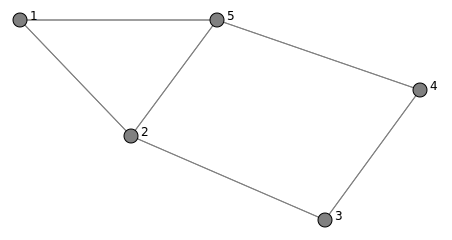

[0.80000004 0.80000004 0.80000004 0.80000004 0.80000004]


C:\Users\ttper\AppData\Roaming\Python\Python311\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:394: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
C:\Users\ttper\AppData\Roaming\Python\Python311\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [56]:
# import csr
from scipy import sparse

diffusion = Diffusion()

neighbors = np.array([[1,4],[0,2,4],[1,3],[2,4],[0,1,3]], dtype=object)

n = neighbors.shape[0]
adjacency = np.zeros((n,n), dtype=int)
for i in range(n):
    for j in neighbors[i]:
        adjacency[i,j] = 1
# is symmetric ?
print(np.all(adjacency == adjacency.T))

print(adjacency)
adjacency = sparse.csr_matrix(adjacency)

image = svg_graph(adjacency, width=400, height=200, display_edges=True, names=np.arange(1,n+1))
display(SVG(image))

# Compute the laplacian matrix
degrees = adjacency.dot(np.ones(n))
laplacian = sparse.diags(degrees) - adjacency

T0 = np.array([2, 0, 1, 1, 0])

# Compute the diffusion matrix
diffusion_matrix = sparse.linalg.expm(-laplacian*100000000)

# Compute the diffusion
T = diffusion_matrix.dot(T0)
print(T)
adjacencyQ5 = adjacency

[0.   0.   0.25 0.5  0.75 1.  ]


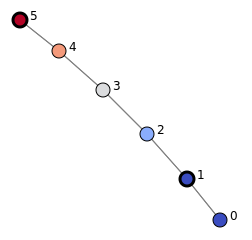

In [44]:
# Linear graph of 6 nodes
adjacency = np.array([[0,1,0,0,0,0],
                        [1,0,1,0,0,0],
                        [0,1,0,1,0,0],
                        [0,0,1,0,1,0],
                        [0,0,0,1,0,1],
                        [0,0,0,0,1,0]])

adjacency = sparse.csr_matrix(adjacency)

dirichlet = Dirichlet()
temperatures = dirichlet.fit_predict(adjacency, values={1:0, 5:1})
print(temperatures)

image = svg_graph(adjacency, width=200, height=200, names=np.arange(6), scores=temperatures, seeds={1:0, 5:1})
SVG(image)


In [7]:
adjacency = np.array([  [0,1,0,0,1],
                        [0,0,1,0,1],
                        [0,0,0,1,0],
                        [0,0,0,0,1],
                        [0,0,0,0,0]])

# Compute the transition matrix of random walk
degrees = adjacency.dot(np.ones(5))
print(degrees)
D = np.zeros((5,5))
for i in range(5):
    if degrees[i] > 0:
        D[i,i] = 1/degrees[i]
    else:
        D[i,i] = 1
print(D)
transition_matrix = D.dot(adjacency)
print(transition_matrix)
T0 = np.array([1, 0, 0, 0, 1])
T1 = transition_matrix.dot(T0)
print(T1)
T2 = transition_matrix.dot(T1)
print(T2)

classifier = DiffusionClassifier(n_iter=2)
probs = classifier.fit_predict_proba(adjacency, {0:0, 4:1})
print(probs)

[2. 2. 1. 1. 0.]
[[0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  1. ]]
[[0.  0.5 0.  0.  0.5]
 [0.  0.  0.5 0.  0.5]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0. ]]
[0.5 0.5 0.  1.  0. ]
[0.25 0.   1.   0.   0.  ]
[[9.99447221e-01 5.52778637e-04]
 [5.00000000e-01 5.00000000e-01]
 [7.58581800e-02 9.24141820e-01]
 [7.58581800e-02 9.24141820e-01]
 [7.58581800e-02 9.24141820e-01]]


[1 1 2 2 1]


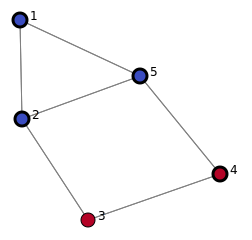

In [58]:
seeds = {0:1, 1:1, 4:1, 3:2}
classifier = DiffusionClassifier()
adjacency = sparse.csr_matrix(adjacencyQ5)
temperatures = classifier.fit_predict(adjacency, seeds)
print(temperatures)
image = svg_graph(adjacency, width=200, height=200, names=np.arange(1,6), seeds=seeds, scores=temperatures)
SVG(image)